# 2A.ML101.4: Supervised Learning: Regression

Here we'll do a short example of a regression problem: learning a continuous value
from a set of features.

The question is: can you predict the progression of the disease?

*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
print(data.data.shape)
print(data.target.shape)

(442, 10)
(442,)


We can see that there are just over 440 data points.

The ``DESCR`` variable has a long description of the dataset:

In [2]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

It often helps to quickly visualize pieces of the data using histograms, scatter plots,
or other plot types.  Here we'll load pylab and show a histogram of the target values:
the median price in each neighborhood.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

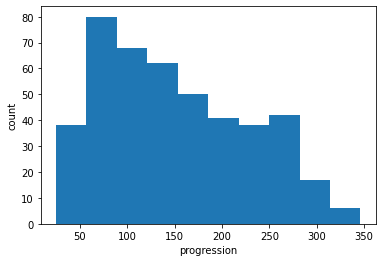

In [4]:
plt.hist(data.target)
plt.xlabel('progression')
plt.ylabel('count');

Let's have a quick look to see if some features are more relevant than others for our problem

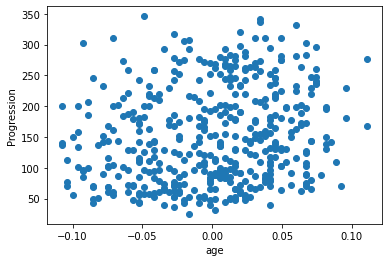

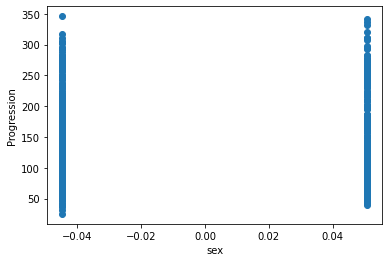

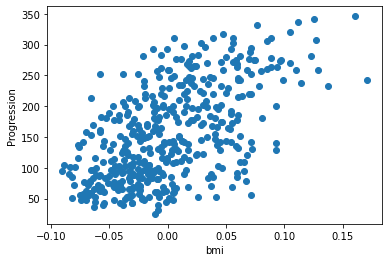

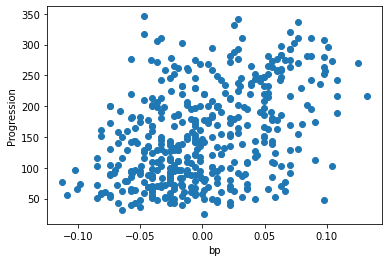

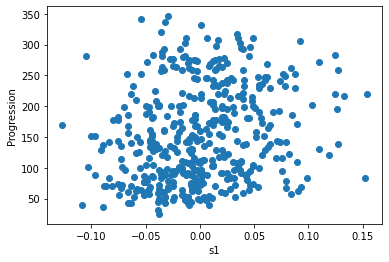

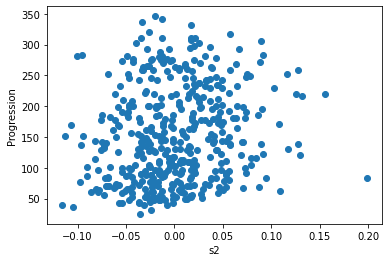

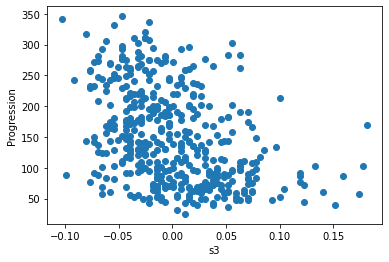

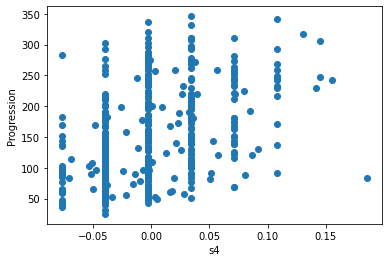

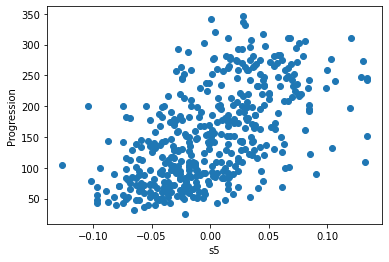

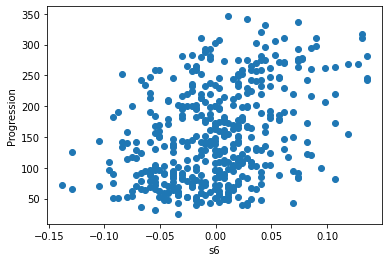

In [5]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Progression')
    plt.xlabel(feature_name)

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use 
feature selection to decide which features are most useful for a
particular problem.  Automated methods exist which quantify this sort
of exercise of choosing the most informative features.

## Predicting Progression: a Simple Linear Regression

Now we'll use ``scikit-learn`` to perform a simple linear regression
on the housing data.  There are many possibilities of regressors to
use. A particularly simple one is ``LinearRegression``: this is
basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [8]:
predicted = clf.predict(X_test)
expected = y_test

RMS: 46.2788680281883


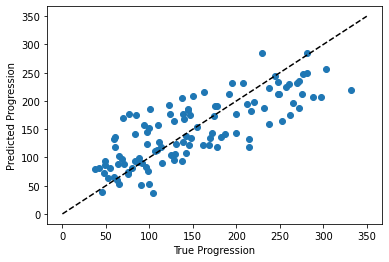

In [9]:
plt.scatter(expected, predicted)
plt.plot([0, 350], [0, 350], '--k')
plt.axis('tight')
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

The prediction at least correlates with the true price, though there
are clearly some biases.  We could imagine evaluating the performance
of the regressor by, say, computing the RMS residuals between the
true and predicted price.  There are some subtleties in this, however,
which we'll cover in a later section.

## Exercise: Gradient Boosting Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try a more powerful one here.

**Use the GradientBoostingRegressor class to fit the data**.

You can copy and paste some of the above code, replacing `LinearRegression`
with `GradientBoostingRegressor`.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model, fit the results, and scatter in vs. out

### Solution:

RMS: 50.35162346769333


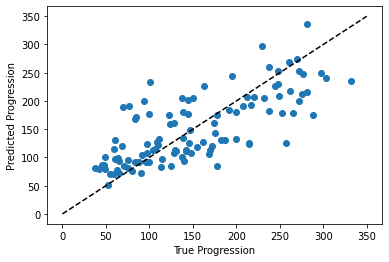

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 350], [0, 350], '--k')
plt.axis('tight')
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))